In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt 
from sklearn import preprocessing
import os
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb


In [2]:
census_data = pd.read_csv('C:\MyFiles/adult.csv')
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
census_data.shape

(32561, 15)

In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
census_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
census_data = census_data[census_data['workclass'].str.contains("\?") == False]
census_data = census_data[census_data['occupation'].str.contains("\?") == False]
census_data = census_data[census_data['native.country'].str.contains("\?") == False]
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [7]:
print(len(census_data))

30162


In [8]:
df = pd.DataFrame(census_data)

#33 Select the columns for Z-score calculation
columns_to_check = ['fnlwgt', 'capital.gain', 'capital.loss']

# Calculate Z-scores for each column
for col in columns_to_check:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[z_scores < 3]

print(len(df))

28273


In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,Local-gov,159908,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,<=50K
1471,72,Local-gov,144515,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1258,40,United-States,<=50K
1473,66,Private,350498,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1258,20,United-States,<=50K
1474,33,Local-gov,262042,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,1138,40,United-States,<=50K
1475,29,Private,138190,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,1138,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
all_feature_cols = [
     'workclass', 
     'education',
     'education.num',
     'marital.status', 
     'occupation', 
     'relationship', 
    'race', 
    'sex',
#     'capital_gain', 
#     'capital_loss', 
    'native.country',
    'income'
]
label_encoder = preprocessing.LabelEncoder()

for c in all_feature_cols:
    t = census_data[c].unique()
    census_data[c]= label_encoder.fit_transform(census_data[c])   
    census_data[c].unique()

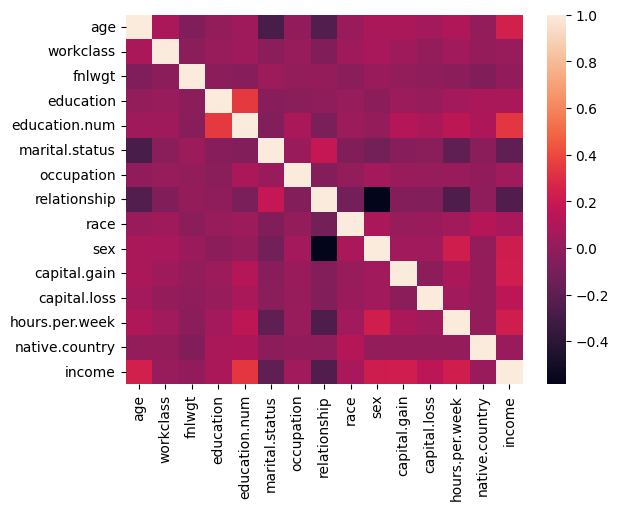

In [11]:
import seaborn as sns
sns.heatmap(census_data.corr())
plt.savefig("myplot.png")

In [12]:
census_data = pd.get_dummies(df, drop_first=True)
census_data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1470,62,159908,13,0,1258,38,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1471,72,144515,16,0,1258,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1473,66,350498,10,0,1258,20,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1474,33,262042,9,0,1138,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1475,29,138190,9,0,1138,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [13]:
X = census_data.iloc[:,:-1]
y = census_data.iloc[:,-1]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)

In [15]:
dt_clf = DecisionTreeClassifier(random_state=24)
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=24)

In [16]:
test_pred = dt_clf.predict(X_test)

In [17]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.87      0.88      0.87      6422
        True       0.60      0.59      0.60      2060

    accuracy                           0.81      8482
   macro avg       0.74      0.73      0.74      8482
weighted avg       0.81      0.81      0.81      8482



### Implementation Two - with pruning ccp_alpha=0.0001

In [18]:
dt_clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.0001)
dt_clf.fit(X_train,Y_train)
test_pred = dt_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.91      0.88      0.90      6696
        True       0.61      0.69      0.64      1786

    accuracy                           0.84      8482
   macro avg       0.76      0.78      0.77      8482
weighted avg       0.85      0.84      0.84      8482



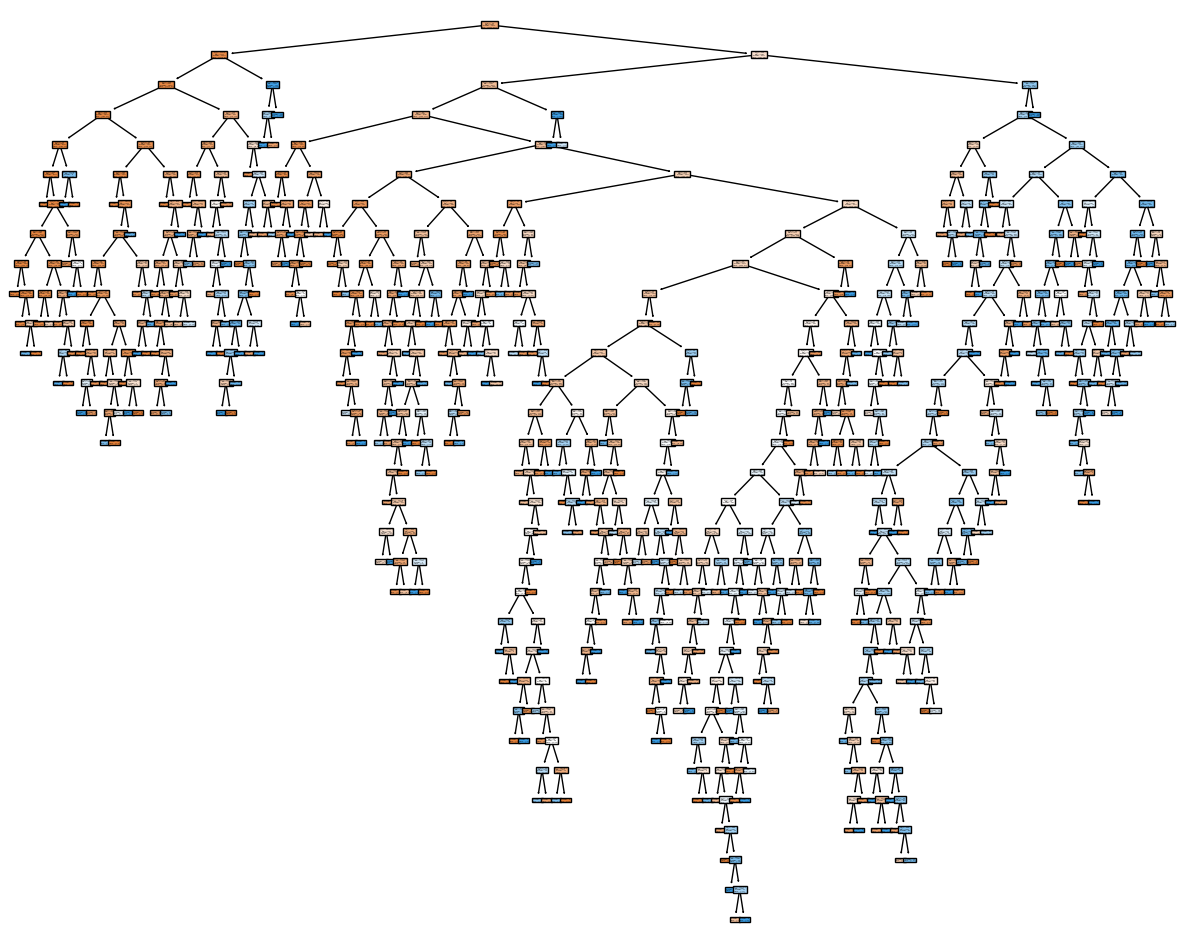

In [19]:
plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True)
plt.show()

### Implementation Three - with pruning ccp_alpha=0.01 - 84% accuracy

In [20]:
dt_clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.01)
dt_clf.fit(X_train,Y_train)
test_pred = dt_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.95      0.86      0.90      7116
        True       0.51      0.75      0.60      1366

    accuracy                           0.84      8482
   macro avg       0.73      0.80      0.75      8482
weighted avg       0.88      0.84      0.85      8482



### Random Forest Implementation

### Implementation One - with no pruning - 85% accuracy 

In [21]:
rf_clf = RandomForestClassifier(random_state=24)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=24)

In [22]:
test_pred = rf_clf.predict(X_test)

In [23]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.92      0.88      0.90      6801
        True       0.59      0.71      0.65      1681

    accuracy                           0.85      8482
   macro avg       0.76      0.79      0.77      8482
weighted avg       0.86      0.85      0.85      8482



### Implementation Two - with n_estimators - 85% accuracy 

In [24]:
rf_clf = RandomForestClassifier(random_state=24, n_estimators =80)
rf_clf.fit(X_train,Y_train)
test_pred = rf_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.92      0.88      0.90      6804
        True       0.59      0.71      0.64      1678

    accuracy                           0.85      8482
   macro avg       0.76      0.79      0.77      8482
weighted avg       0.86      0.85      0.85      8482



### Implementation Three - with pruning ccp_alpha=0.0001 - 86% accuracy

In [25]:
rf_clf = RandomForestClassifier(random_state=24, ccp_alpha=0.0001)
rf_clf.fit(X_train,Y_train)
test_pred = rf_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.94      0.88      0.91      6921
        True       0.59      0.76      0.66      1561

    accuracy                           0.86      8482
   macro avg       0.77      0.82      0.79      8482
weighted avg       0.88      0.86      0.86      8482



In [26]:
# Define XGBoost model parameters 
xgb_params = {
    'objective': 'binary:logistic',  # Assuming binary classification
    'random_state': 24,  # Set the same random state
    'learning_rate': 0.1,  # Adjust learning rate as needed
    'max_depth': 5,  # Adjust max depth as needed
}

# Create DMatrix for XGBoost (assuming pandas DataFrames)
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

# Train the XGBoost model
xgb_model = xgb.train(xgb_params, dtrain)

# Make predictions with XGBoost model
test_pred = xgb_model.predict(dtest)

In [27]:
threshold = 0.5
test_pred_categorical = [1 if p >= threshold else 0 for p in test_pred]

# Print classification report
print(classification_report(Y_test, test_pred_categorical))

              precision    recall  f1-score   support

       False       0.84      0.98      0.90      6466
        True       0.86      0.40      0.54      2016

    accuracy                           0.84      8482
   macro avg       0.85      0.69      0.72      8482
weighted avg       0.84      0.84      0.82      8482



In [36]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test)

# Train the model
model = lgb.train(params, train_data, valid_sets=[train_data,test_data])

# Make predictions
y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 4492, number of negative: 15299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 19791, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226972 -> initscore=-1.225489
[LightGBM] [Info] Start training from score -1.225489


In [37]:

# Evaluate the model
threshold = 0.5
test_pred_categorical = [1 if p >= threshold else 0 for p in test_pred]

# Print classification report
print(classification_report(Y_test, test_pred_categorical))

              precision    recall  f1-score   support

       False       0.84      0.98      0.90      6466
        True       0.86      0.40      0.54      2016

    accuracy                           0.84      8482
   macro avg       0.85      0.69      0.72      8482
weighted avg       0.84      0.84      0.82      8482



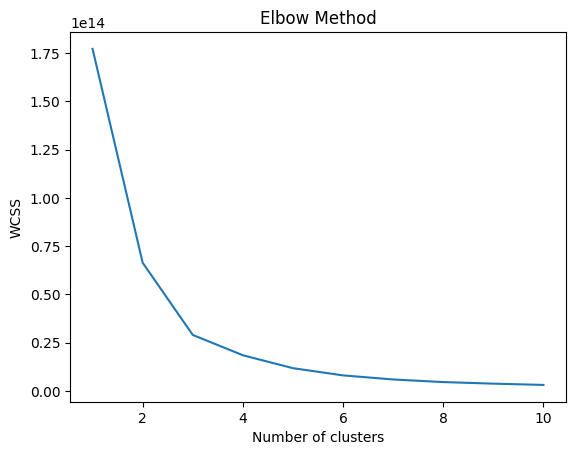

In [28]:
#using elbow for optimal number of k
# Iterate through different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init="auto", random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot   

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:

knn = KNeighborsClassifier(n_neighbors=2)

# Train the model on the training data
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.96      0.87      6466
        True       0.63      0.24      0.35      2016

    accuracy                           0.79      8482
   macro avg       0.72      0.60      0.61      8482
weighted avg       0.76      0.79      0.75      8482



In [39]:

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.90      0.85      6466
        True       0.49      0.32      0.39      2016

    accuracy                           0.76      8482
   macro avg       0.65      0.61      0.62      8482
weighted avg       0.73      0.76      0.74      8482



In [40]:

knn = KNeighborsClassifier(n_neighbors=4)

# Train the model on the training data
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.97      0.88      6466
        True       0.69      0.23      0.34      2016

    accuracy                           0.79      8482
   macro avg       0.74      0.60      0.61      8482
weighted avg       0.77      0.79      0.75      8482



In [41]:
clf = GaussianNB()

# Train the model (assuming X_train and Y_train are your training data)
clf.fit(X_train, Y_train)

# Make predictions on the testing set (assuming X_test is your testing data)
y_pred = clf.predict(X_test)

# Evaluate the model's performance using classification_report
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       False       0.80      0.96      0.87      6466
        True       0.64      0.22      0.32      2016

    accuracy                           0.78      8482
   macro avg       0.72      0.59      0.60      8482
weighted avg       0.76      0.78      0.74      8482



In [ ]:
clf = SVC(kernel='linear')
# Linear kernel for simple cases

# Train the model
clf.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
print(classification_report(Y_test, y_pred))